In [1]:
import pandas as pd
import networkx as nx
import pickle 

import numpy as np
from heapq import heapify, heappush, heappop
from utils_2_3 import first,path,dijkstra,new_graph,traceback,maps,links,create_path,visualizePath

from Utils_2_4 import new_graph_SumWeights,Min_cut,findUser

# We can start creating the needed first graph

In [2]:
answers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-a2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [3]:
startingTime=pd.to_datetime('2016-01-01')

In [4]:
answers["Date"]=pd.to_datetime(answers['Date'],unit='s')

In [5]:
Recent_answers=answers[(answers['Date'] >= startingTime) & (answers["Active_User"] != answers["Passive_User"])].copy()

In [6]:
Recent_answers["weight"]=1

In [7]:
g = nx.from_pandas_edgelist(Recent_answers, "Active_User", "Passive_User", edge_attr="weight",edge_key="Date",create_using=nx.MultiDiGraph())

# loading the comments on questions

In [8]:
comments_onQuestions=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [9]:
comments_onQuestions["Date"]=pd.to_datetime(comments_onQuestions['Date'],unit='s')

Selecting only the most recent comments

In [10]:
Recent_comments_onQuestions=comments_onQuestions[(comments_onQuestions['Date'] >= startingTime) & (comments_onQuestions["Active_User"] != comments_onQuestions["Passive_User"])].copy()

In [11]:
Recent_comments_onQuestions["weight"]=0.4

In [12]:
g2 = nx.from_pandas_edgelist(Recent_comments_onQuestions, "Active_User", "Passive_User", edge_attr="weight",edge_key="Date",create_using=nx.MultiDiGraph())

# Combining the MultiDiGraph using the networkx library

In [13]:
G = nx.compose(g,g2)

# Loading all the comments on answers

In [14]:
comments_onAnswers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2a.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [15]:
comments_onAnswers["Date"]=pd.to_datetime(comments_onAnswers['Date'],unit='s')

Selecting only the most recent comments

In [16]:
Recent_comments_onAnswers=comments_onAnswers[(comments_onAnswers['Date'] >= startingTime) & (comments_onAnswers["Active_User"] != comments_onAnswers["Passive_User"])].copy()

In [17]:
Recent_comments_onAnswers["weight"]=0.6

In [18]:
g3 = nx.from_pandas_edgelist(Recent_comments_onAnswers, "Active_User", "Passive_User", edge_attr="weight",edge_key="Date",create_using=nx.MultiDiGraph())

combining the multi-graph using the networkx library

In [19]:
final_G = nx.compose(g3,G)

In [20]:
pickle.dump(final_G, open('final_G', 'wb'))

# Ex 2.3 and 3.3

Now since we are interested in the shortest walk path, we preprocess our graph, we make it a simple graph with interactions that happend in our desired interval, no more a MultiDiGraph( this preprocessing happens inside the "path" method).
we decided to do this because for this exercise we are interested only at the directed edge with the smallest weight between 2 node that happened in our desired interval of time.
And therefore we create this graph for each interval of time that we need to look for.

we load the  MultiDiGraph

In [21]:
# Load graph
with open("final_G", 'rb') as f: 
    G_loaded = pickle.load(f)

just a remainder of the number of nodes and edges

In [22]:
print(len(G_loaded.nodes()))

429318


In [23]:
print(len(G_loaded.edges()))

1854034


First step: we decided to rename the nodes with numbers from 0 to n with n that is equal to the number of nodes

We use the "first" method, that returns the renamed  graph and a random sequence of nodes

In [24]:
dg,index,mapping=first(G_loaded)

Now, we can start creating the arguments 

In [25]:
startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2016-01-08')

First, I want to execute the "path" method using the random path

In [26]:
path(0,3294,index,dg,startingTime,endTime,mapping)

the sequnce of nodes : 
[0, 334630, 152746, 242244, 158203, 241646, 376151, 3294]
the node 334630 doesn't interact in the chosen interval of time


[]

Since we use a limited interval of time, can happen that there isn't a path that follows the sequence of nodes.

Sometimes a node that interacts in the entire graph, doesn't interact at all in our desidered interval of time( like in our example the node 334630)

However this time, I want to choose a path  that I know it exits

In [27]:
index= [ 1543, 59, 10089 ]

the sequnce of nodes : 
[0, 1543, 59, 10089, 3294]
the smallest path distance between 0 and 1543 is  0.6
the smallest path distance between 1543 and 59 is  0.6
the smallest path distance between 59 and 10089 is  2.0
the smallest path distance between 10089 and 3294 is  1.2
The path that we need to follow is  [(0, 1543), (1543, 59), (59, 7323), (7323, 1543), (1543, 10089), (10089, 1543), (1543, 3294)]

The starting and the end node are filled with red
The path from 0 to 3294 is evidenced by red edges


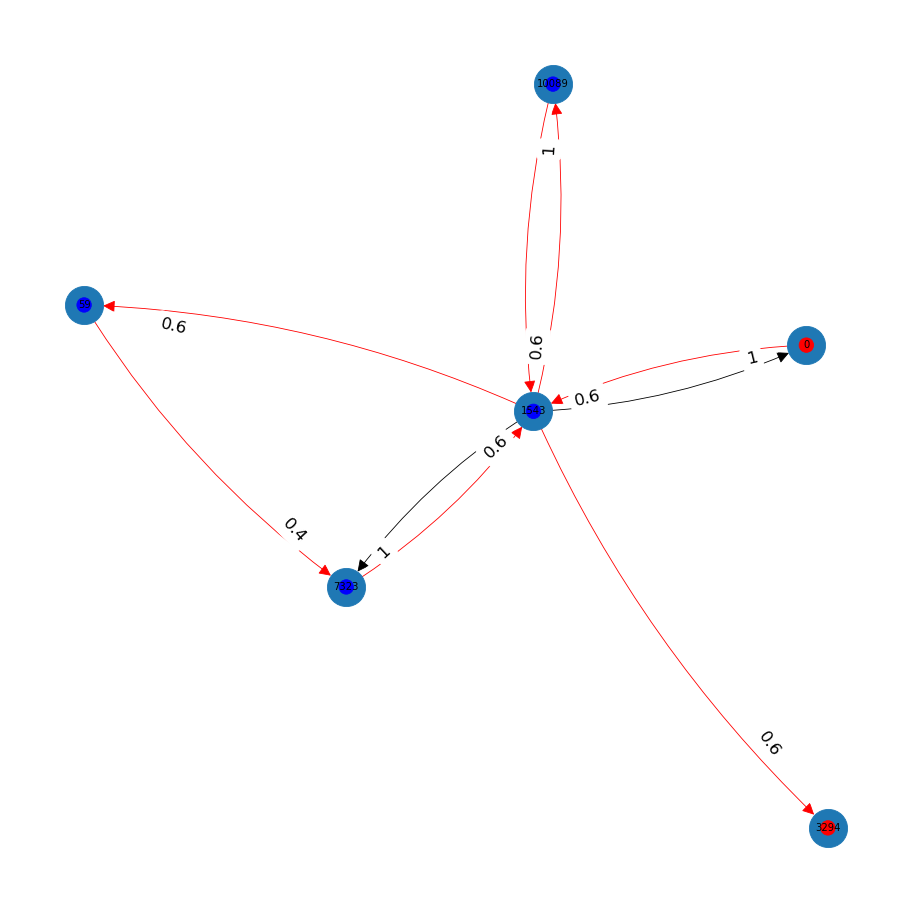

[0, 1543, 59, 7323, 1543, 10089, 1543, 3294]

In [28]:
path(0,3294,index,dg,startingTime,endTime,mapping)

This time, the path exits and we find that the total cost is 4.4

# Ex 2.4 and 3.4

We create the timestamps to select the intervals

In [29]:
# Load graph
with open("/Users/simone/Desktop/final_G", 'rb') as f: 
    G_loaded = pickle.load(f)

In [30]:
startingTime1=pd.to_datetime('2016-01-01')
endTime1=pd.to_datetime('2016-01-02')
startingTime2=pd.to_datetime('2016-01-06')
endTime2=pd.to_datetime('2017-01-03')

startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2018-01-03')

First there is the step where we rename the nodes (we use the same function used for the 2.3 exercise)

In [31]:
dg,mapping=maps(G_loaded)

 inside the Min_cut function, we preprocess the saved MultiDigraph, also in this case it's better to keep only one edge between two nodes.
So, we decided to make it a simple direct graph with edges that are interactions that happend during an interval of time and that have as a weight the sum of all the weights of the happened interactions in that interval of time

Now we find the two users that I need

In [ ]:
user1,user2=findUser(startingTime1,endTime1,startingTime2,endTime1,dg)

Since we couldn't find the right 2 intervals of time, to get the 2 nodes, we decided to  disconnect 2 chosen nodes from the graph

The main idea is to find a path using djkstra, then remove the edge with the smallest weight and execute dikjstra again until there isn't a path that links the 2 nodes.

the smallest path distance between 0 and 190 is  1.2
The path is : [(0, 1), (1, 190)]
Here, the path that links 0 and 190

The starting and the end node are filled with red
The link that will be removed,it is evidenced by a red edge


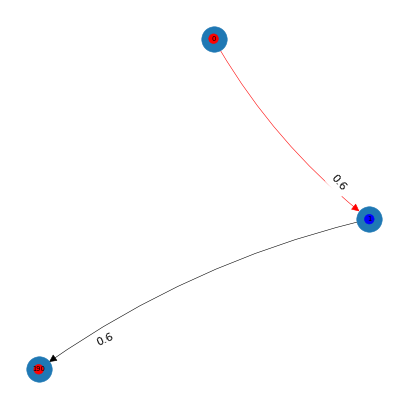

there isn't a path between this two values 0 and 190
the minimum number of links (considering their weight) is  1


(0.6, [(0, 1)])

In [33]:
Min_cut(dg,0,190,startingTime,endTime,mapping)